<a href="https://colab.research.google.com/github/dwgb93/SIAM-Neural-Nets/blob/main/Baby's_First_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My First Neural Network: Convergence

In this notebook, we'll be creating a simple neural network and using it to classify handwritten digits. This is from the popular MNIST data set consisting of 60,000 digits pre-split into a training and testing set.

First: some bookkeeping. We'll import a bunch of packages that let this all work.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Next we'll download the data we are going to use

In [2]:
# the data is already split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Each pixel is a value from 0 to 255, so we normalize it to 0 to 1. 
# This is optional, and generally speeds up training. You could also do -1 to 1. Try it and see what works best!
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


Let's look at a few of the images so we know what we're dealing with.

Text(0.5, 1.0, 'Label is 9')

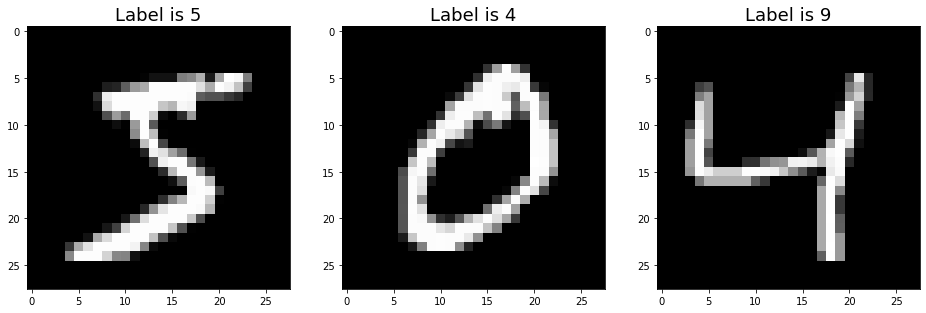

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0], cmap="gray")
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[1], cmap="gray")
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[2], cmap="gray")
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

Finally, let's build our first neural network!

We'll start with the input layer. Since we have a 28x28 image, we need 784 neurons.


In [15]:
model = keras.models.Sequential([
  # we start with our input layer
  keras.layers.Flatten(input_shape=(28, 28)),

  # next, we'll add a hidden layer. Maybe 128 neurons? Why not
  keras.layers.Dense(128, activation='sigmoid'),

  # finally, we need an output layer, with 
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now, let's train the neural network!

We'll start by going through the entire dataset 5 times.

In [14]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0742 - accuracy: 0.6398
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.9027
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.9116
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9185
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2615 - accuracy: 0.9220
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9270
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2439 - accuracy: 0.9279
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2375 - accuracy: 0.9281
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

[0.1850692331790924, 0.9449999928474426]

Not bad! 90% accuracy in less than 20 seconds!
How can we do better?

The obvious step is to just keep training for longer.

Try going for 20 epochs and see if it does any better.

What if we change the activation function?

Sigmoid:

Tanh: 

ReLU:

What you might have started to notice though is that our training accuracy is  better than our testing accuracy. 

We've looked at the training set so many times that we're starting to learn ONLY those images.

This is known as ***overfitting***, and we generally want to avoid it.

Techniques we can use to avoid overfitting:


*   Reduce the number of parameters in our network
*   Change the structure of our network
*   Train for fewer epochs
*   Don't use all the neurons at once

Let's give these a try!



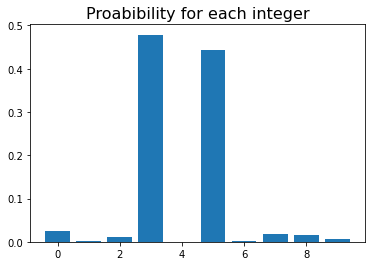

In [6]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 16)
plt.show()

What if we have random noise?

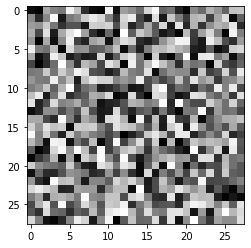

In [7]:
my_noise = np.random.rand(784)
plt.imshow(np.reshape(my_noise, (28,28)), cmap="gray")


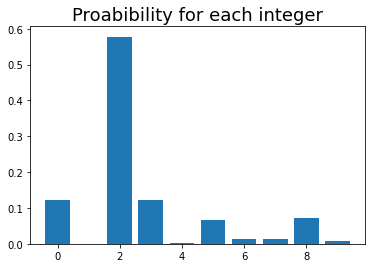

In [8]:
plt.bar(np.arange(0,10,1), model.predict(my_noise[np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()